In [ ]:
# emprical probabailities
import pandas as pd
from datetime import datetime as dt
import datetime as dtp
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# create combined dataset 
data = pd.DataFrame()
files = ['FinalData\FD_2006Q1.csv','FinalData\FD_2006Q2.csv','FinalData\FD_2006Q3.csv','FinalData\FD_2006Q4.csv','FinalData\FD_2007Q1.csv','FinalData\FD_2007Q2.csv','FinalData\FD_2007Q3.csv','FinalData\FD_2007Q4.csv','FinalData\FD_2008Q1.csv','FinalData\FD_2008Q2.csv','FinalData\FD_2008Q3.csv','FinalData\FD_2008Q4.csv']
# files = ['FinalData1\FD_2006Q1.csv','FinalData1\FD_2006Q2.csv','FinalData1\FD_2006Q3.csv','FinalData1\FD_2006Q4.csv','FinalData1\FD_2007Q1.csv','FinalData1\FD_2007Q2.csv','FinalData1\FD_2007Q3.csv','FinalData1\FD_2007Q4.csv','FinalData1\FD_2008Q1.csv','FinalData1\FD_2008Q2.csv','FinalData1\FD_2008Q3.csv','FinalData1\FD_2008Q4.csv']
# files = ['FinalData2006.csv']
for i in files:
    temp = pd.read_csv(i)
    data = data.append(temp)


In [ ]:
del_data = data.query("Status == 1")
cur_data = data.query("Status == 0")
def_data = data.query("Status == 2")
pre_data = data.query("Status == -1")
# print(data['Target'].value_counts())
# data['Status'].value_counts()

In [ ]:
p_del_pre = 0
p_cur_pre = 0
probability = (del_data["Target"].value_counts()/len(del_data))
p_del_pre = round(probability[-1]*100,3)
p_del_del = round(((probability[1]*100)/(100-p_del_pre)*100),3)
p_del_cur = round(((probability[0]*100)/(100-p_del_pre)*100),3)
p_del_def = round(((probability[2]*100)/(100-p_del_pre)*100),3)
p_del_pre = 0
probability = cur_data["Target"].value_counts()/len(cur_data)
p_cur_del = round(probability[1]*100,3)
p_cur_cur = round(probability[0]*100,3)
p_cur_def = round(probability[2]*100,3)
p_cur_pre = round(probability[-1]*100,3)

In [ ]:
#create Matrix
#    | pre cur del def |
# pre| 0   0   0   0 |
# cur| 0   0   0   0 |
# del| 0   0   0   0 |
# def| 0   0   0   0 |
np.set_printoptions(formatter={'float_kind':lambda x: "%.2f" % x })
probabilities = np.array([[100,0,0,0],[p_cur_pre,p_cur_cur,p_cur_del,p_cur_def],[p_del_pre,p_del_cur,p_del_del,p_del_def],[0,0,0,100]])
print(probabilities)

[[100.00 0.00 0.00 0.00]
 [1.46 97.99 0.54 0.00]
 [0.00 7.78 83.40 8.81]
 [0.00 0.00 0.00 100.00]]


In [ ]:
# create probability of default by time 
d=data.groupby("Monthly Reporting Period")
n = d["Target"].value_counts()

In [ ]:
temp = probabilities/100
print(temp)
for i in range(0,1000):
    temp = temp.dot(probabilities/100)
print(temp)
init = np.array([0,1,0,0])
init.dot(temp)


[[1.00 0.00 0.00 0.00]
 [0.01 0.98 0.01 0.00]
 [0.00 0.08 0.83 0.09]
 [0.00 0.00 0.00 1.00]]
[[1.00 0.00 0.00 0.00]
 [0.83 0.00 0.00 0.17]
 [0.39 0.00 0.00 0.61]
 [0.00 0.00 0.00 1.00]]


array([0.83, 0.00, 0.00, 0.17])

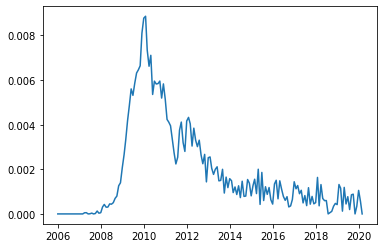

In [ ]:
dates = data['Monthly Reporting Period'].unique()
dict = {}
dts = [dt.strptime(str(date), '%m%Y') for date in dates]
for i in range(0,len(dates)):
    try:
        defaults = n[dates[i]][2]
    except:
        defaults = 0
    dict[dts[i]]=defaults/n[dates[i]].sum()
keys = sorted(dict.keys())
values = [dict[k] for k in keys]
plt.plot(keys,values)
plt.show()

In [ ]:
data['Target'].value_counts()
probability = cur_data["Target"].value_counts()/len(cur_data)
print(probability)

 0    0.979919
-1    0.014642
 1    0.005413
 2    0.000025
Name: Target, dtype: float64


In [ ]:
data.to_csv("FinalData1029.csv")